### Nivell 1
Realitza la connexió en Python amb el MySQL Workbench per a carregar tota la informació que tens en les taules.

Realitzaràs una visualització per a cada exercici. Comenta el que et crida l'atenció de graficar aquesta variable, justifica l'elecció del gràfic i interpreta els resultats en funció de les teves dades.



In [41]:


from dotenv import load_dotenv
"""Carrega una funció especial (load_dotenv) que serveix per llegir un fitxer .env 
on es guarden variables d'entorn (com contrasenyes, noms d'usuari, etc.)."""
#Executa la funció per carregar les variables d'aquest fitxer .env al sistema.
load_dotenv()

import os                           #Mòdul de Python que permet accedir a funcionalitats del sistema operatiu
import mysql.connector              #Mòdul per connectar-se a bases de dades MySQL
from mysql.connector import Error   #Importa la classe Error per gestionar errors de connexió
import pandas as pd                 #Mòdul per treballar amb dades en forma de taules (DataFrames)

# 1. Establir conexió
try:
    conexion = mysql.connector.connect(         #funció que crea la connexió                
        host=os.getenv("DB_HOST"),              #s’utilitza os.getenv("NOM_VARIABLE") per obtenir els valors definits al .env
        port=os.getenv("DB_PORT"),
        user=os.getenv("DB_USER"),
        password=os.getenv("DB_PASSWORD"),
        database="base_de_dades"
    )

    if conexion.is_connected():                 #Comprova si la connexió s'ha establert correctament
        print("\n¡Conexió exitosa al port 3306! 🚀")
        cursor = conexion.cursor()              #Crea un cursor, un "punter" que permet fer consultes a la base de dades.


        
        # Obtenir versió
        cursor.execute("SELECT VERSION()")      #Executa una consulta SQL per saber la versió del servidor MySQL
        version = cursor.fetchone()             #fetchone() obté el primer resultat de la consulta
        print(f"Versió de MySQL: {version[0]}") # mostra la versió del servidor MySQL
        
        # Pas 2: Obtenir llista de taules
        cursor.execute("SHOW TABLES")   #Executa una consulta SQL per obtenir totes les taules de la base de dades  
        taules = [taula[0] for taula in cursor.fetchall()]      #fetchall() recupera TOTES les taules taula[0] s'utilitza perquè cada resultat és una tupla (ex: ('transactions',)).
        print("\nTaules detectades:", "| ".join(taules))
        
        # Paa 3: Crear diccionari de DataFrames 
        dataframes = {}             #Diccionari buit per emmagatzemar els DataFrames de cada taula
        for taula in taules:        #Fa una iteració sobre cada taula de la llista taules
            # Per cada taula, crea un DataFrame i l'emmagatzema al diccionari
            print(f"Caregant {taula}...", end=" ")
            dataframes[taula] = pd.read_sql(f"SELECT * FROM {taula}", conexion) #llegeix directament el resultat i el converteix en DataFrame
            print(f"✅ ({len(dataframes[taula])} registres)")


except Error as e:
    print(f"\n❌ Error: {e}\n")

finally:                                    #s’executa sempre, hagi anat bé o malament el codi anterior
    # Tancar conexió de forma segura
    if 'conexion' in locals() and conexion.is_connected():
        cursor.close()
        conexion.close()
        print("\nConexió tancada.")


¡Conexió exitosa al port 3306! 🚀
Versió de MySQL: 8.0.42

Taules detectades: companies| credit_card_estat| credit_cards| products| transactions| transactions_products| users
Caregant companies... ✅ (100 registres)
Caregant credit_card_estat... ✅ (275 registres)
Caregant credit_cards... ✅ (275 registres)
Caregant products... ✅ (100 registres)
Caregant transactions... ✅ (587 registres)
Caregant transactions_products... ✅ (1457 registres)
Caregant users... ✅ (275 registres)

Conexió tancada.


C:\Users\PC\AppData\Local\Temp\ipykernel_25952\2385230627.py:43: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



In [42]:
#Reanomenem els DataFrames per a facilitar el seu ús posterior
credit_card_estat_df = dataframes['credit_card_estat']
companies_df = dataframes['companies']
credit_cards_df = dataframes['credit_cards']
products_df = dataframes['products']
transactions_df = dataframes['transactions']
transactions_products_df = dataframes['transactions_products']
users_df = dataframes['users']

#### Exercici 1: 
Una variable numèrica

- Llibreries: Matplotlib, Seaborn
- Gràfic: Histplot, KDE (Kernel Density Estimate)
- Variables: transactions_df['amount']
- Interpretació: 
Distribució asimètrica positiva (esbiaixada cap a la dreta):
La majoria de transaccions són valors baixos.
El pic màxim es troba a l'interval 0-100 unitats (≈25% de les transaccions).
A mesura que augmenta l'import, la freqüència disminueix ràpidament.

Freqüència per intervals:
Transaccions petites (0-100): Dominen la distribució (≈25%).
Transaccions mitjanes (100-400): Frequència decreixent:


Visualització de la imatge

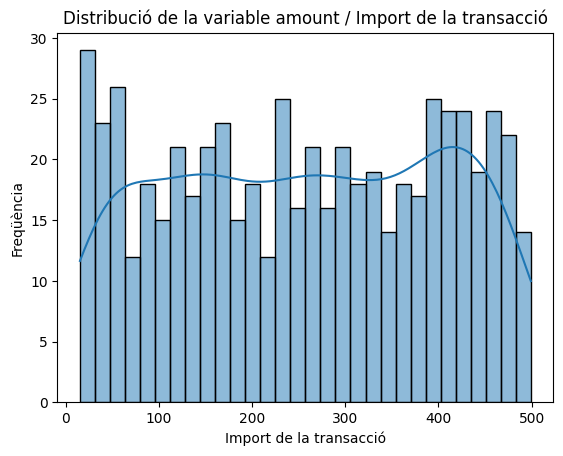

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(transactions_df, x='amount', bins=30, kde=True) 

plt.title('Distribució de la variable amount / Import de la transacció')
plt.xlabel('Import de la transacció')
plt.ylabel('Freqüència')
plt.show()

#### Exercici 2: 
Dues variables numèriques

- Llibreries: pandas, matplotlib, datetime, seaborn
- Gràfic: Gràfic de dispersió o Scatterplot, Línia de tendència o regplot
- Variables: edad usuaris, mitjana import
- Interpretació: Cada punt representa la mitjana de import de transaccions per a cada grup d'edat dels usuaris. La  línia de tendència mostra que quan augmenta l'edat augmenta l'import mitjà de les transaccions.

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

# Convertim a datetime
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'])

# 2. Fem el merge amb les columnes
df_combinat = pd.merge(
    transactions_df[['user_id', 'amount','timestamp','declined']],
    users_df[['id', 'birth_date','country']],
    left_on='user_id',    # Columna a transactions
    right_on='id',        # Columna a users
    how='inner'           # Només usuaris amb transaccions
).drop('id', axis=1)      # Eliminem la columna duplicada

df_combinat['edat'] = df_combinat['timestamp'].dt.year - df_combinat['birth_date'].dt.year

# 3. Calcular mitjana per usuari

mitjanes_per_usuari = df_combinat.groupby('edat')['amount'].mean().reset_index(
    name='mitjana_import'  # Nom de la nova columna
)


Visualització de la imatge

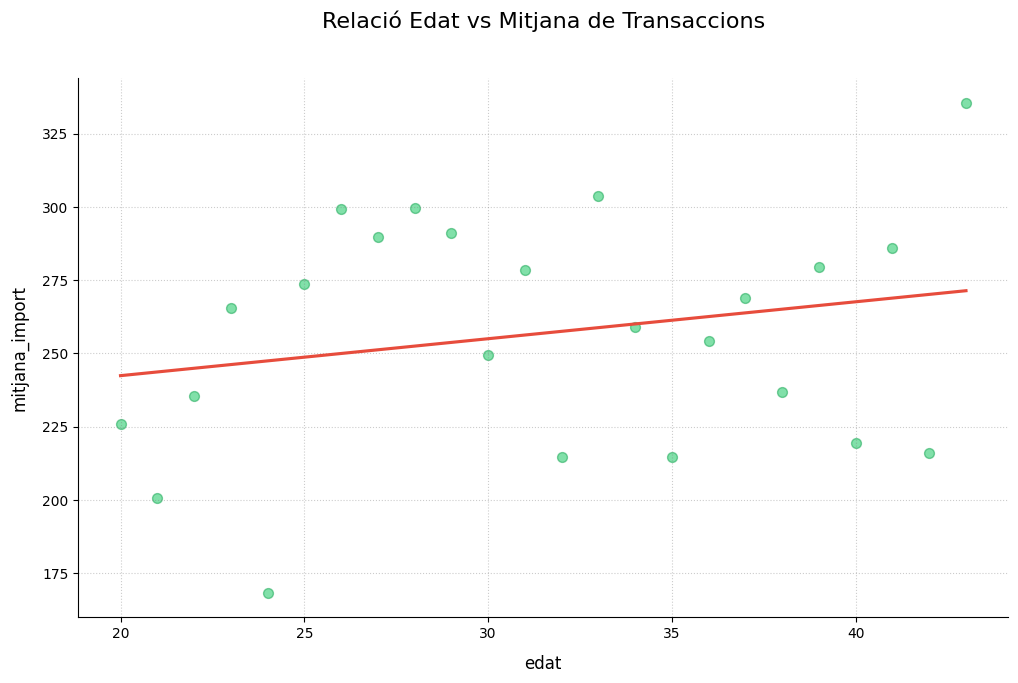

In [45]:
# 4. Visualització
plt.figure(figsize=(12, 7))
plt.scatter(
    x=mitjanes_per_usuari['edat'],
    y=mitjanes_per_usuari['mitjana_import'],
    s=50,                # Mida dels punts
    alpha=0.6,
    c='#2ecc71',         # Color verd modern
    edgecolor='#27ae60'  # Contorn més fosc
)

# Títol i etiquetes
plt.title('Relació Edat vs Mitjana de Transaccions\n', fontsize=16, pad=20)
plt.xlabel('Edat (anys)', fontsize=12, labelpad=10)
plt.ylabel('Import Mitjà ($)', fontsize=12, labelpad=10)

# Millores visuals
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(linestyle=':', color='grey', alpha=0.4)

# Línia de tendència amb seaborn per a més facilitat

sns.regplot(
    x='edat',
    y='mitjana_import',
    ci=None,
    data=mitjanes_per_usuari,
    scatter=False,
    line_kws={'color': '#e74c3c'}
)

plt.show()

#### Exercici 3: 
Una variable categòrica

- Llibreries: plotly.express
- Gràfic: Treemap
- Variables: companies_df[['company_name,'country','region']], transactons_df['amount']
- Interpretació: Podem veure com la majoria de les vendes es realitzen desde Unió Europea, seguit per Paísos Nordics, Regne Unit i Nord Amèrica. Àsia Pacífic és residual. A més podem veure com a Europa, Alemanya representa el 50% amb Nunc Interdum Incorporated com a principal empresa, éssent els reste residuals; Irlanda representa aprox. el 25% i Malesuda PC la empresa principal. El reste de Paísos i empreses tenen una representació molt menys significativa. Als Paísos Nòrdics, Suècia i Noruega es reparteixen al 50% el pes, éssent Ut Semper Fundation i Arcu LLP respectivament les principals empreses. Al Regne Unit, Enim Condimentum Ltd i Non Insitute son les principals empreses, el reste son residuals. A Nord Amèrcia Canada representa el 75% del pes amb Lorem Eu Incorporated amb el mateix pes representatiu que el país. A estats Units el pes de les empreses està molt atomitzat, i a Àsia Pacífic, Australia i Nova Zelanda son els principals protagonistes

In [46]:
import plotly.express as px

# 1. Combinar DataFrames
merged_df = pd.merge(
    companies_df,
    transactions_df,
    left_on="company_id",
    right_on="business_id",
    how="inner"
)

# 2. Mapeig de països a regions 
regions_comercials = {
    'Australia':'Àsia_Pacífic',
    'New Zealand':'Àsia_Pacífic',
    'China':'Àsia_Pacífic',
    'Canada':'Nord_Amèrica',
    'United States':'Nord_Amèrica',
    'Norway':'Paísos_Nòrdics',
    'Sweden':'Paísos_Nòrdics',
    'United Kingdom':'Regne_Unit',
    'Belgium':'Unió_Europea',
    'France':'Unió_Europea',
    'Germany':'Unió_Europea',
    'Ireland':'Unió_Europea',
    'Italy':'Unió_Europea',
    'Netherlands':'Unió_Europea',
    'Spain':'Unió_Europea'
}

# 3. Afegir columna de regió
merged_df["region"] = merged_df["country"].map(regions_comercials)

# 4. Verificar valors nuls
print("Països sense regió assignada:", merged_df[merged_df["region"].isnull()]["country"].unique())
# 5. Agrupar per REGIÓ, PAÍS i EMPRESA (afegim company_name)
treemap_data = merged_df.groupby(["region", "country", "company_name"])["amount"].sum().reset_index()


Països sense regió assignada: []


Visualització de la imatge

In [47]:

# 6. Crear el treemap amb 3 nivells
fig = px.treemap(
    treemap_data,
    path=["region", "country", "company_name"],  # Jerarquia: Regió -> País -> Empresa
    values="amount",             
    color="region",              
    title="Import Total per Regió, País i Empresa",
    hover_data={"amount": ":.2f€"},
    color_discrete_sequence=px.colors.qualitative.Pastel,
    branchvalues="total"  # Mostra la proporció correcta empresa/país
)

# Millores visuals
fig.update_layout(
    margin=dict(t=50, l=25, r=25, b=25),
    hoverlabel=dict(bgcolor="white", font_size=12)  # Format hover
)

fig.show()

#### Exercici 4: 
Una variable categòrica i una numèrica.

- Llibreries: pandas, matplotlib, pandas
- Gràfic: Gràfic de caixa o boxplot, Stripplot (Punts individuals)
- Variables: users_df['country'],transactions_df['amount']
- Interpretació: 
USA domina en imports alts:
50% de les transaccions són superiors a $200 (vs. $100 a UK/Canada)
Presència significativa de transaccions de gran valor (>$300)

UK i Canada tenen perfils similars, però amb diferències subtils:
UK mostra lleugerament més variabilitat (punts més dispersos)

Canada té menys valors extrems (màxim observat ≈ $400 vs. $500 a UK)

Totes les distribucions són asimètriques positives:
Cua llarga cap a valors alts (mediana < mitjana)
Indicatiu de consum heterogeni (majoria petites transaccions + poques molt altes)

In [48]:
import matplotlib.pyplot as plt 
import seaborn as sns

# 1. Configurar colors
colors_paísos = {
    "United States": "#1426ea",  # Blau
    "Canada": "#f50909",         # Vermell
    "United Kingdom": "#432ca0"  # Blau cel
}

# 2. Seleccionar països i filtrar
selected_countries = list(colors_paísos.keys())
filtered_df = df_combinat[df_combinat["country"].isin(selected_countries)]


Visualització de la imatge

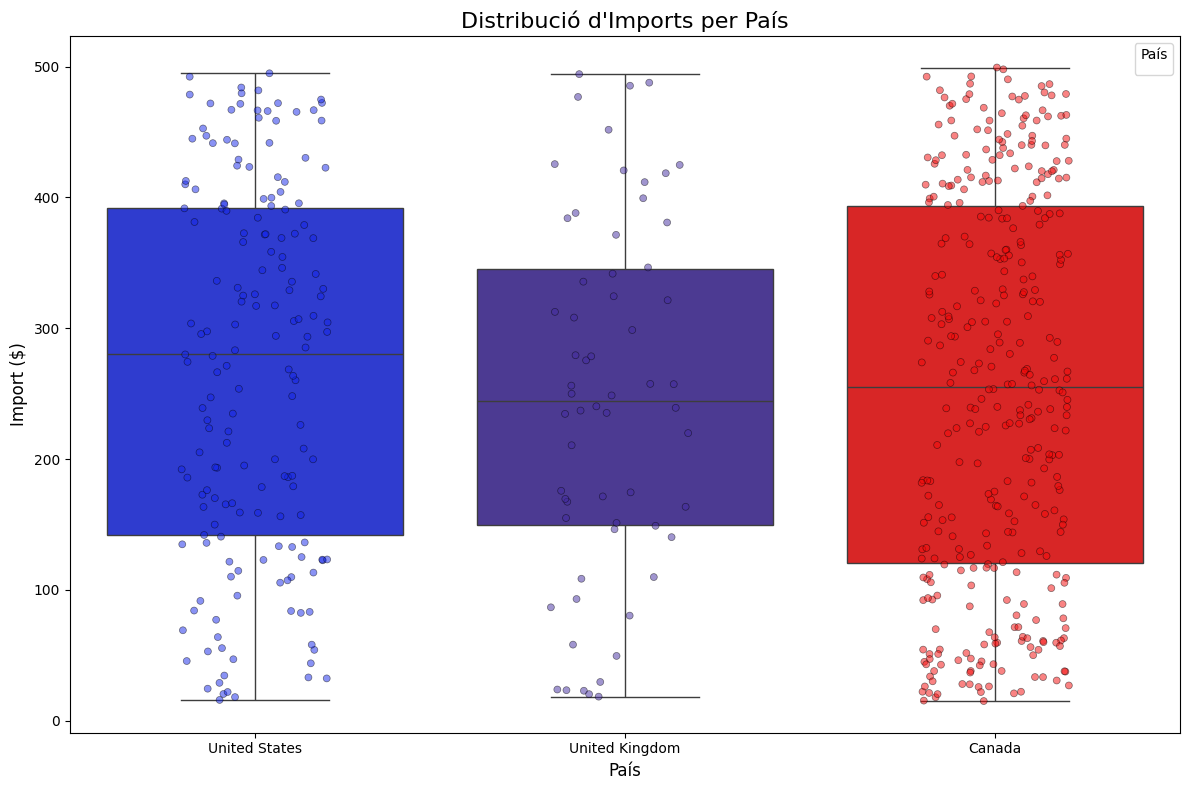

In [49]:

# 3. Crear el boxplot amb jitter
plt.figure(figsize=(12, 8))  

# Boxplot
sns.boxplot(
    data=filtered_df,
    x="country",
    y="amount",
    hue="country",
    palette=colors_paísos
    
)

# Stripplot (punts individuals)
sns.stripplot(
    x='country', 
    y='amount', 
    data=filtered_df, 
    hue="country",
    palette=colors_paísos,
    jitter=0.2,
    size=5,
    alpha=0.5,
    edgecolor='black',
    linewidth=0.5,
    legend=False  # Evitar duplicar llegenda
)


# 4. Configurar títols i etiquetes
plt.title("Distribució d'Imports per País", fontsize=16)
plt.xlabel("País", fontsize=12)
plt.ylabel("Import ($)", fontsize=12)

# 5. Optimitzar llegenda
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))  # Eliminar duplicats
plt.legend(unique_labels.values(), unique_labels.keys(), title='País')

# 6. Mostrar gràfic
plt.tight_layout()
plt.show()

#### Exercici 5: 
Dues variables categòriques.

- Llibreries: pandas, plotly.graph_objects
- Gràfic: Diagrama de Sankey
- Variables: paísos_empreses, paísos_usuaris, transactions_df['amount'] 
- Interpretació: Aquest gràfic Sankey mostra com flueixen els diners des de les empreses de certs països cap a usuaris d’altres països, representant:
A l’esquerra: països on es troben les empreses.
A la dreta: països dels usuaris que reben les transaccions.
L’amplada de les línies representa el volum de diners ($) transferit.
Els colors dels nodes indiquen l’origen del país, segons un codi de colors predefinit. UK, United Kingdom i USA tenen el seu propi color. A mode de breu explicació podem dir que UK ven a Canadà i USA, Canadà ven a Canada i a USA i USA ven només a Canadà.

In [50]:
# Importar les llibreries necessàries
import plotly.graph_objects as go
import pandas as pd

# Configuració de colors
colors_paísos = {
    "United States": "#118dff",
    "Canada": "#f20004",
    "United Kingdom": "#12239b"
}

# Fusionar i renombrar
sk_merged_df = (
    pd.merge(
        companies_df.rename(columns={'country': 'country_company'}),
        transactions_df,
        left_on="company_id",
        right_on="business_id",
        how="inner"
    )
    .merge(
        users_df.rename(columns={'country': 'country_user'}),
        left_on="user_id",
        right_on="id",
        how="inner"
    )
)
# Agrupar i sumar els imports per païs d'empresa i païs d'usuari
flow_data = (
    sk_merged_df
    .groupby(['country_company', 'country_user'])['amount']
    .sum()
    .reset_index(name='total_amount')
)


# Crear llistes separades per a paísos de empreses i usuaris
paísos_empreses = list(flow_data['country_company'].unique())
paísos_usuaris = list(flow_data['country_user'].unique())

# Llista completa de nodes (primer empresas, després usuaris)
all_nodes = paísos_empreses + paísos_usuaris

# Mapejar a índexs numèrics
flow_data['source_idx'] = flow_data['country_company'].apply(
    lambda x: paísos_empreses.index(x)
)
flow_data['target_idx'] = flow_data['country_user'].apply(
    lambda x: len(paísos_empreses) + paísos_usuaris.index(x)
)

# Crear colors per a tots els nodes
node_colors = []
for country in all_nodes:
    # Determinar si el païss està al diccionari de colors
    if country in colors_paísos:
        node_colors.append(colors_paísos[country])
    else:
        # Color per defecte per a paísos no especificats
        node_colors.append("#CCCCCC")


Visualització de la imatge

In [51]:

# Crear diagrama Sankey
fig = go.Figure(data=[go.Sankey(
    arrangement='snap',  # Mejor organización de nodos
    node=dict(
        pad=30,
        thickness=20,
        line=dict(width=0.5),
        label=all_nodes,
        color=node_colors,
        x=[0] * len(paísos_empreses) + [1] * len(paísos_usuaris),  # Posición: 0=izq, 1=der
        y=[i/len(paísos_empreses) for i in range(len(paísos_empreses))] +
          [i/len(paísos_usuaris) for i in range(len(paísos_usuaris))]
    ),
    link=dict(
    source=flow_data['source_idx'],
    target=flow_data['target_idx'],
    value=flow_data['total_amount'],        
    color='rgba(150, 150, 150, 0.5)'
)

)])

fig.update_layout(
    title_text="Fluxes transaccionals entre paísos en $",
    font_size=12,
    height=700,
    annotations=[
        dict(
            x=0, y=1.05,
            xref='paper', yref='paper',
            text="Paísos d' Empreses",
            showarrow=False,
            font_size=14
        ),
        dict(
            x=1, y=1.05,
            xref='paper', yref='paper',
            text="Paísos d'Usuaris",
            showarrow=False,
            font_size=14
        )
    ]
)

fig.show()

#### Exercici 6:
Tres variables

- Llibreries: pandas, matplotlib.pyplot, seaborn
- Gràfic: Mapa de calor (Heatmap)
- Variables: Nom_complert del producte, company_name, transactions_df['amount']
- Interpretació: Aquest heatmap conté 3 eixos que són empresa, nom complert producte i suma d'import. 

Permet visualitzar:

Quins productes són els més venuts per cada empresa.
Winterfell_67 de Nunc Interdum Incorporated és l'article més venut en termes absoluts

Com es distribueixen les vendes entre productes i empreses.

Els valors més alts (en colors més intensos) indiquen major import econòmic generat per aquell producte en aquella empresa.

El filtratge millora la llegibilitat, deixant només les empreses i productes més rellevants en termes de vendes.

In [52]:
# Importar les llibreries necessàries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

products_df['Nom_complert'] = products_df['product_name']+'-'+products_df['id'].astype(str)
# 1. Combinar els DataFrames necessaris
merged_df = pd.merge(
    transactions_df,
    transactions_products_df[['transaction_id', 'product_id']],
    left_on='id',
    right_on='transaction_id',
    how='inner'
).merge(
    companies_df[['company_id', 'company_name']],
    left_on='business_id',
    right_on='company_id',
    how='inner'
).merge(
    products_df[['id', 'Nom_complert']],
    left_on='product_id',
    right_on='id', )

# 2. Agrupar les dades per empresa i producte
pivot_table = merged_df.pivot_table(
    index='company_name',
    columns='Nom_complert',
    values='amount',
    aggfunc='sum', 
    fill_value=0
)

# 3. Filtrar per a millorar la visualizació
# Mantenir només empresas amb certa  activitat
pivot_table = pivot_table[pivot_table.sum(axis=1) > pivot_table.sum().quantile(0.75)]
# Mantenir només products populars
pivot_table = pivot_table.loc[:, pivot_table.sum(axis=0) > pivot_table.sum(axis=0).quantile(0.75)]


Visualització de la imatge

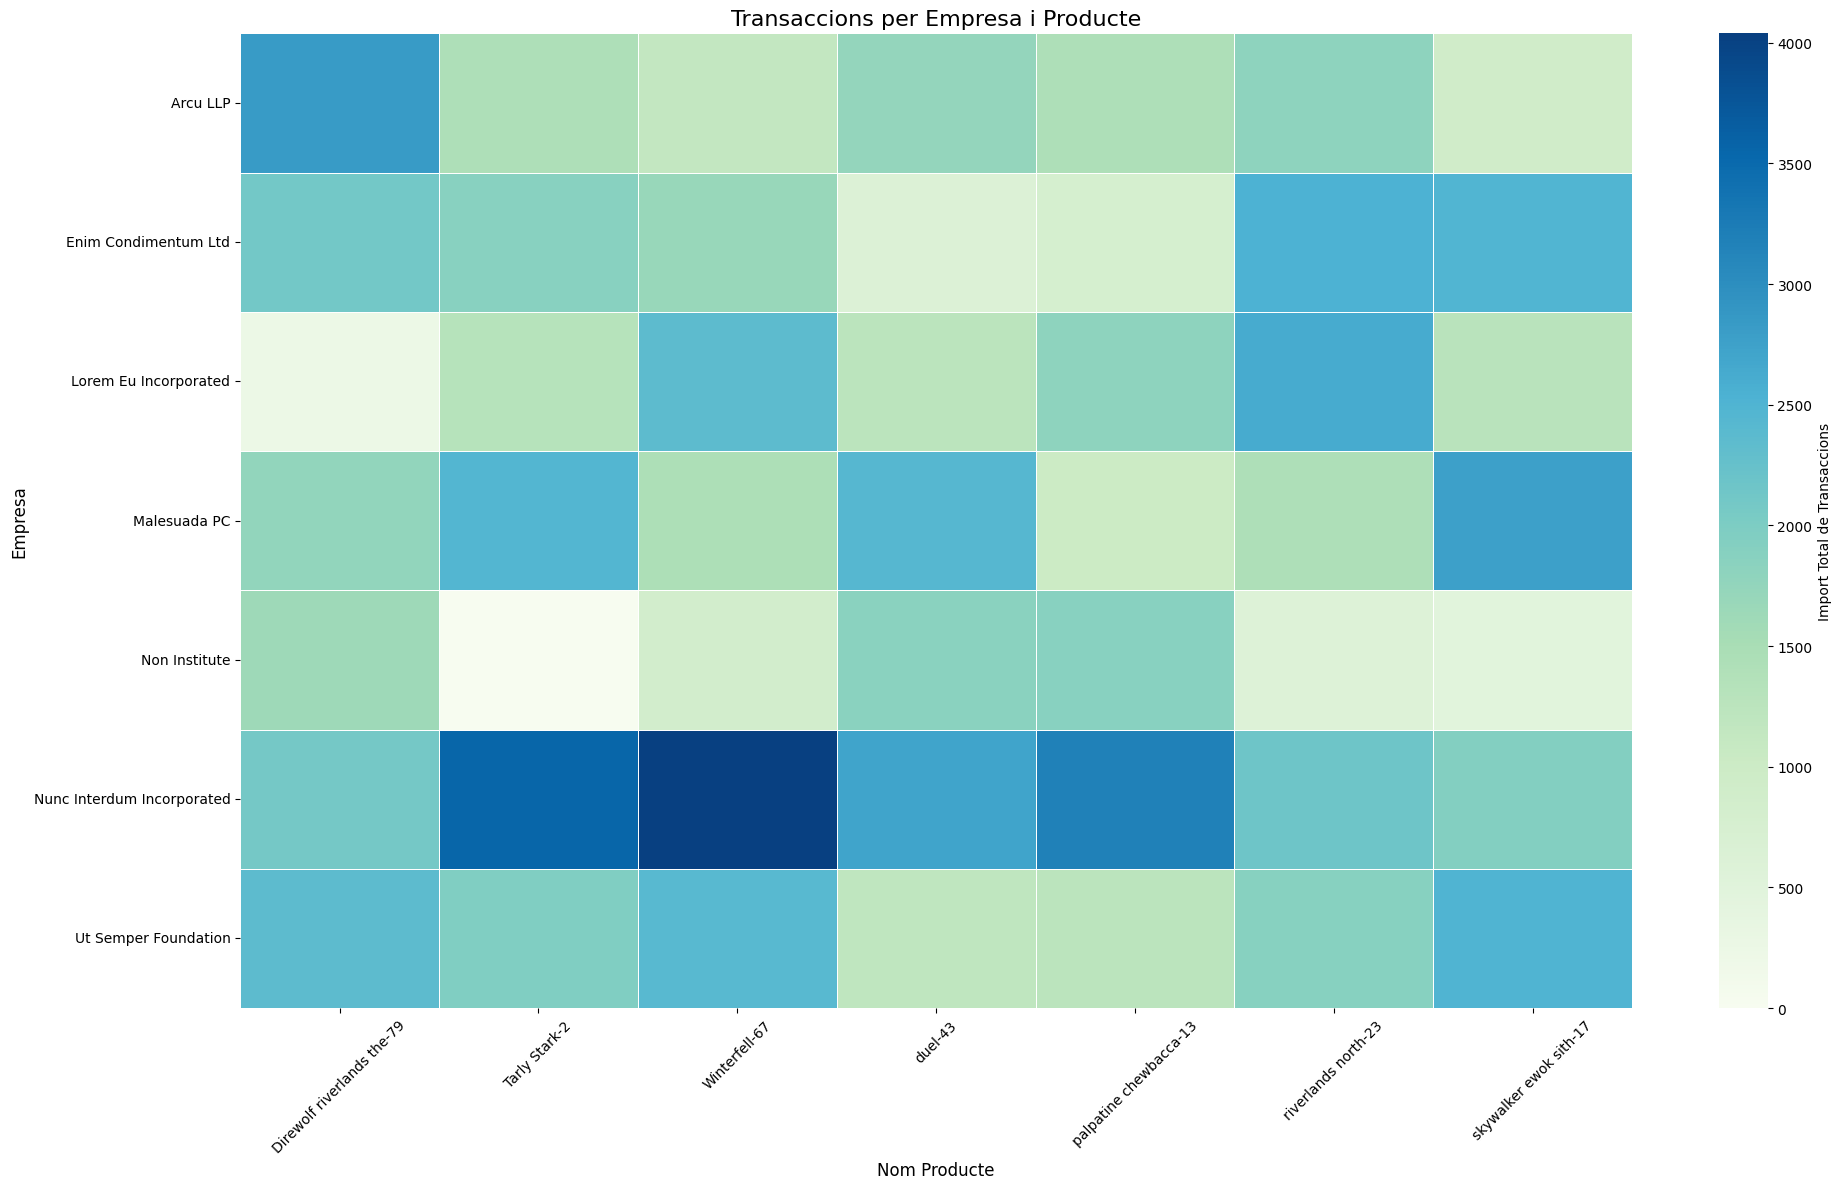

In [53]:

# 4. Crear el heatmap
plt.figure(figsize=(20, 12))
sns.heatmap(
    pivot_table,
    cmap='GnBu',  # Paleta de colors
    annot=False,  
    fmt=".0f",   # Format de números (enter)
    linewidths=0.5,
    cbar_kws={'label': 'Import Total de Transaccions'}
)

plt.title('Transaccions per Empresa i Producte', fontsize=16)
plt.xlabel('Nom Producte', fontsize=12)
plt.ylabel('Empresa', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Exercici 7:
Graficar un Pairplot.

- Llibreries: pandas, matplotlib.pyplot, seaborn
- Gràfic: Pairplot
- Variables: products_df[['weight','price']], transactions_df['amount'],users_df['country']
- Interpretació: 

Relacions entre Preu, Pes i Import de Transacció
1. Relació Preu vs Pes 
Tendència positiva: Hi ha una correlació moderada (coef. 0.248).
Països destacats:

Canadà: Productes d'alt preu i major pes 

EUA: Gran varietat de productes (tots els pesos i preus)

Regne Unit: Productes lleugers i de preu mitjà-baix

2. Relació Preu vs Import 
Sense correlació (coef. 0.0089):

Els imports de transacció no depenen del preu individual del producte

Exemple: Productes de preu baix poden generar transaccions altes (compres múltiples)

Canadà: Agrupa les transaccions més altes (>400)

3. Relació Pes vs Import 
Correlació inexistent (coef. -0.0245):

El pes del producte no influeix en l'import de la transacció

Productes lleugers poden tenir transaccions altes

EUA: Domina en transaccions mitjanes (100-300)

Conclusions Clau per País

País	        Preu-Pes	                Preu-Import	                Pes-Import

Estats Units:	Màxima varietat	            Import mitjà (200)	        Import mitjà (200)

Regne Unit:	    Productes lleugers/barats	Import baix (100)	        Import baix (100)

Canadà:	        Productes cars i pesats	    Màxim import (500)	        Import alt (400)

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Combinar les dades 
df_combinat = pd.merge(
    transactions_df,
    transactions_products_df[['transaction_id', 'product_id']],  
    left_on='id',
    right_on='transaction_id',
    how='inner'
).merge(
    products_df[['id', 'price', 'weight']], 
    left_on='product_id',
    right_on='id',
    how='inner',
    suffixes=('_transaction', '_product')  # Afegir sufíxs per evitar conflictes de noms
).merge(
    users_df[['id', 'country']],
    left_on='user_id',
    right_on='id',
    how='inner',   

)

# 2. Seleccionar les variables d'interès
plot_data = df_combinat[['price', 'weight', 'amount','country']]  # 'amount' ve de transactions_df, 'price' i 'weight' de products_df


Visualització de la imatge

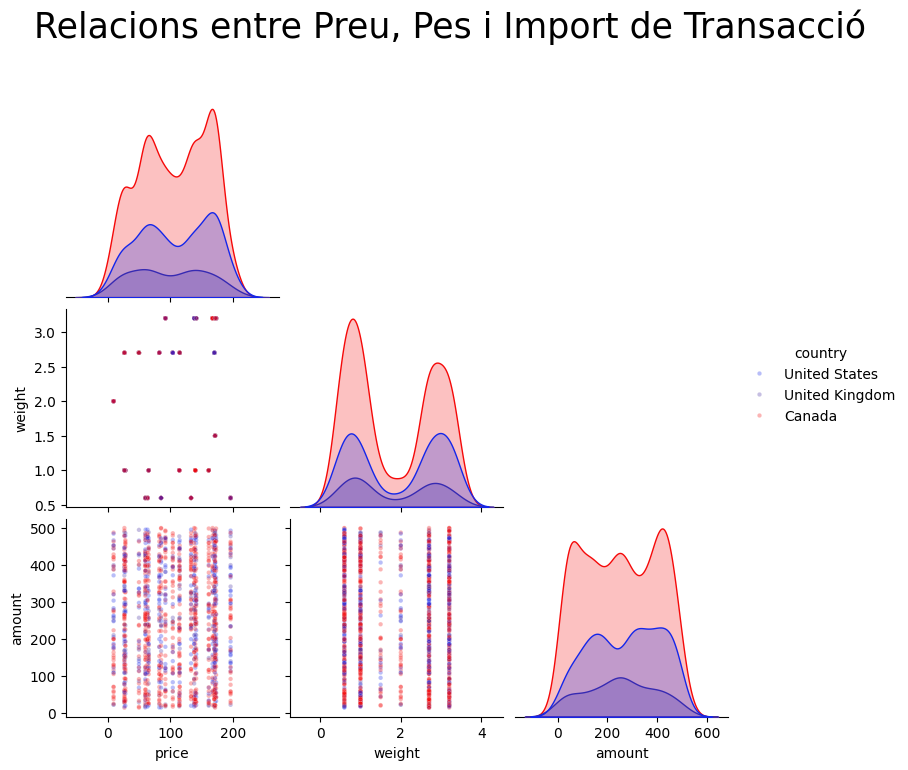

In [55]:
# 3. Configurar colors
colors_paísos = {
    "United States": "#1426ea",  # Blau
    "Canada": "#f50909",         # Vermell
    "United Kingdom": "#432ca0"  # Blau cel
}

# 4.Crear el pairplot i guardar l'objecte PairGrid
g = sns.pairplot(
    plot_data,
    corner=True,
    diag_kind='kde',
    plot_kws={
        'alpha': 0.3,
        's': 10
    },
    diag_kws={
        'fill': True
    },
    hue='country',
    palette=colors_paísos,
)

# 5.Ajustar el títol principal
g.fig.suptitle(
    'Relacions entre Preu, Pes i Import de Transacció',
    fontsize=25,
    y=1.02  # Ajusta aquest valor per moure verticalment
)

# 6.Ajustar els marges per fer espai per al títol
g.fig.subplots_adjust(top=0.90)  # Redueix aquest valor per donar més espai al títol

#Mostrar gràfic
plt.show()


### Nivell 2

#### Exercici 1:
Correlació de totes les variables numèriques

- Llibreries: pandas, matplotlib.pyplot, seaborn, scipy.stats
- Gràfic: Heatmap
- Variables: edat usuaris, products_df[['price', 'weight']], transactions_df['amount']
- Interpretació:
Totes les variables (amount, price, weight, edat) NO segueixen una distribució normal.

Correlacions entre Variables (Matriu de Correlació):
Pràcticament NO hi ha relacions lineals entre les variables:

Parella de Variables	Correlació	Interpretació

amount vs price	0.0089	Sense relació (com si fossin aleatòries)

amount vs weight	-0.0246	Sense relació (negligible)

amount vs edat	0.0095	Sense relació (molt dèbil)

price vs weight	0.2483	Relació dèbil positiva (poc important)

price vs edat	0.0323	Sense relació

weight vs edat	0.0208	Sense relació

In [56]:
# Importar les llibreries necessàries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import shapiro

# Convertim a datetime 
users_df['birth_date'] = pd.to_datetime(users_df['birth_date'])

# 1. Combinar les dades 
df_combinat = pd.merge(
    transactions_df,
    transactions_products_df[['transaction_id', 'product_id']],  
    left_on='id',
    right_on='transaction_id',
    how='inner'
).merge(
    products_df[['id', 'price', 'weight']], 
    left_on='product_id',
    right_on='id',
    how='inner',
    suffixes=('_transaction', '_product')  # Afegir sufíxs per evitar conflictes de noms
).merge(
    users_df[['id', 'country','birth_date']],
    left_on='user_id',
    right_on='id',
    how='inner',   

)
df_combinat['edat'] = df_combinat['timestamp'].dt.year - df_combinat['birth_date'].dt.year


for col in ['amount', 'price', 'weight','edat']:
    # 1. Extreure i netejar la sèrie
    data = df_combinat[col].dropna().astype(float)
    
    # 2. Mostrejar si cal (Shapiro no accepta més de 5000 punts)
    if len(data) > 5000:
        data = data.sample(5000, random_state=42)
    
    # 3. Test de normalitat
    stat, p = shapiro(data)
    print(f'Columna: {col}')
    print(f'  stat = {stat:.3f}, p = {p:.3f}')
    
    # 4. Interpretació
    if p > 0.05:
        print('  Probable distribució normal\n')
    else:
        print('  Probablement NO segueix una distribució normal\n')



#Matriu de correlació
matriu_de_correlació = df_combinat[['amount', 'price', 'weight','edat']].corr(method='spearman')                

print(matriu_de_correlació)

Columna: amount
  stat = 0.947, p = 0.000
  Probablement NO segueix una distribució normal

Columna: price
  stat = 0.936, p = 0.000
  Probablement NO segueix una distribució normal

Columna: weight
  stat = 0.807, p = 0.000
  Probablement NO segueix una distribució normal

Columna: edat
  stat = 0.943, p = 0.000
  Probablement NO segueix una distribució normal

          amount     price    weight      edat
amount  1.000000  0.008881 -0.024555  0.009484
price   0.008881  1.000000  0.248283  0.032293
weight -0.024555  0.248283  1.000000  0.020795
edat    0.009484  0.032293  0.020795  1.000000


Visualització de la imatge

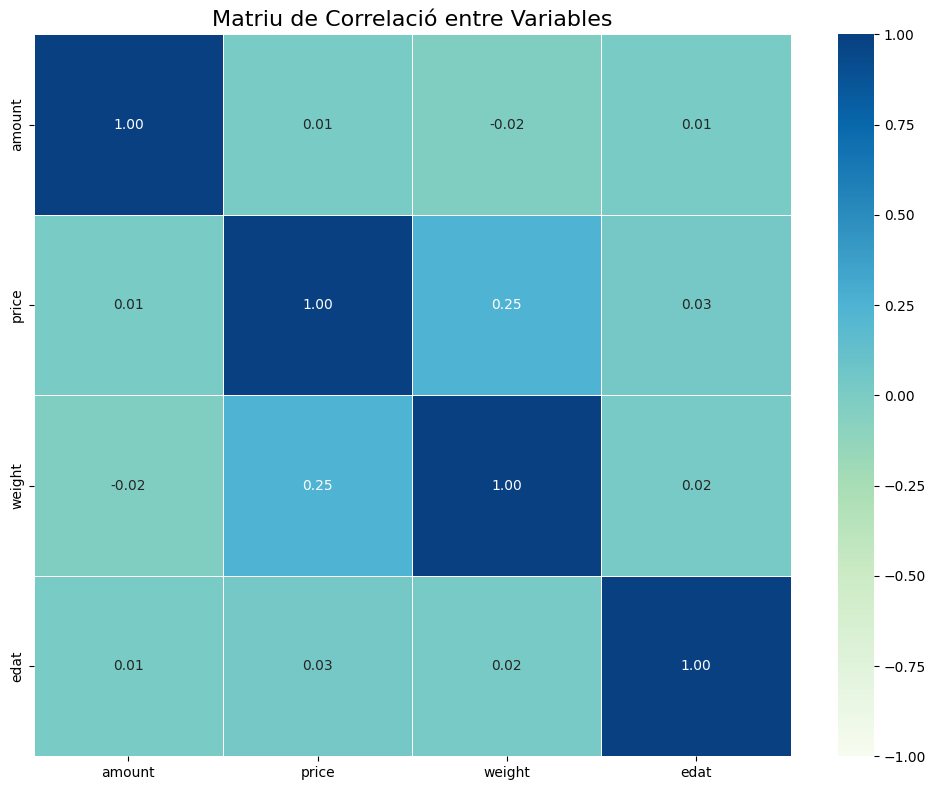

In [57]:
#Mostrar la matriu de correlació amb heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(
    matriu_de_correlació,
    annot=True,         # Mostra els valors numèrics
    cmap='GnBu',        # Escala de colors
    fmt=".2f",          # Format dels decimals
    linewidths=0.5,
    vmin=-1, vmax=1     # Rang de valors per a la correlació
)

plt.title('Matriu de Correlació entre Variables', fontsize=16)
plt.tight_layout()
plt.show()

#### Exercici 2: 
Implementa un jointplot.

###  Jointplot directe amb cada transacció

- Llibreries: pandas, matplotlib.pyplot, datetime, seaborn
- Gràfic: Joinplot
- Variables: edat usuaris, transactions_df['amount'],users_df['country']
- Interpretació:
1) Interpretació global del gràfic

Distribució d’edats i import
La majoria de transaccions es concentren entre els 28 i 35 anys, amb un pic molt marcat en els voltants dels 30 anys per als tres països.
Pel que fa a l’import, la densitat marginal mostra que la gran part de transaccions es mou entre 100 € i 300 €, amb una cua lleugerament més marcada per a imports més elevats en el cas de Canadà.

Patrons per país

EUA (blau cel):
Més transaccions al voltant dels 30 anys.
L’import mitjà se situa en uns 100–200 € en aquesta franja, i hi ha una tendència a imports una mica més alts (fins a 250 €) entre els 35 i 40 anys, però amb menys volum de transaccions.

Regne Unit (blau fosc):

També un pic de freqüència al voltant dels 30 anys, però en import mitjà no sobresurt significativament respecte a EUA o Canadà.
A partir de 35 anys, veiem una lleugera disminució de nombre de transaccions.

Canadà (vermell):

Pic de freqüència a prop de 30 anys.
Mostra una cua d’“imports alts” més pronunciada: un nombre relativament més gran de transaccions per sobre de 300 € entre 35 i 45 anys, si bé el volum total de transaccions baixa a mesura que envelleix el client.

Correlació edat–import
No hi ha un patró d’“augment exponencial” de l’import amb l’edat; més aviat veiem un augment moderat de l’import mitjà fins a mitjans dels 30 anys i després una lleugera caiguda amb l’edat, comuna a tots els mercats.

Visualització de la imatge

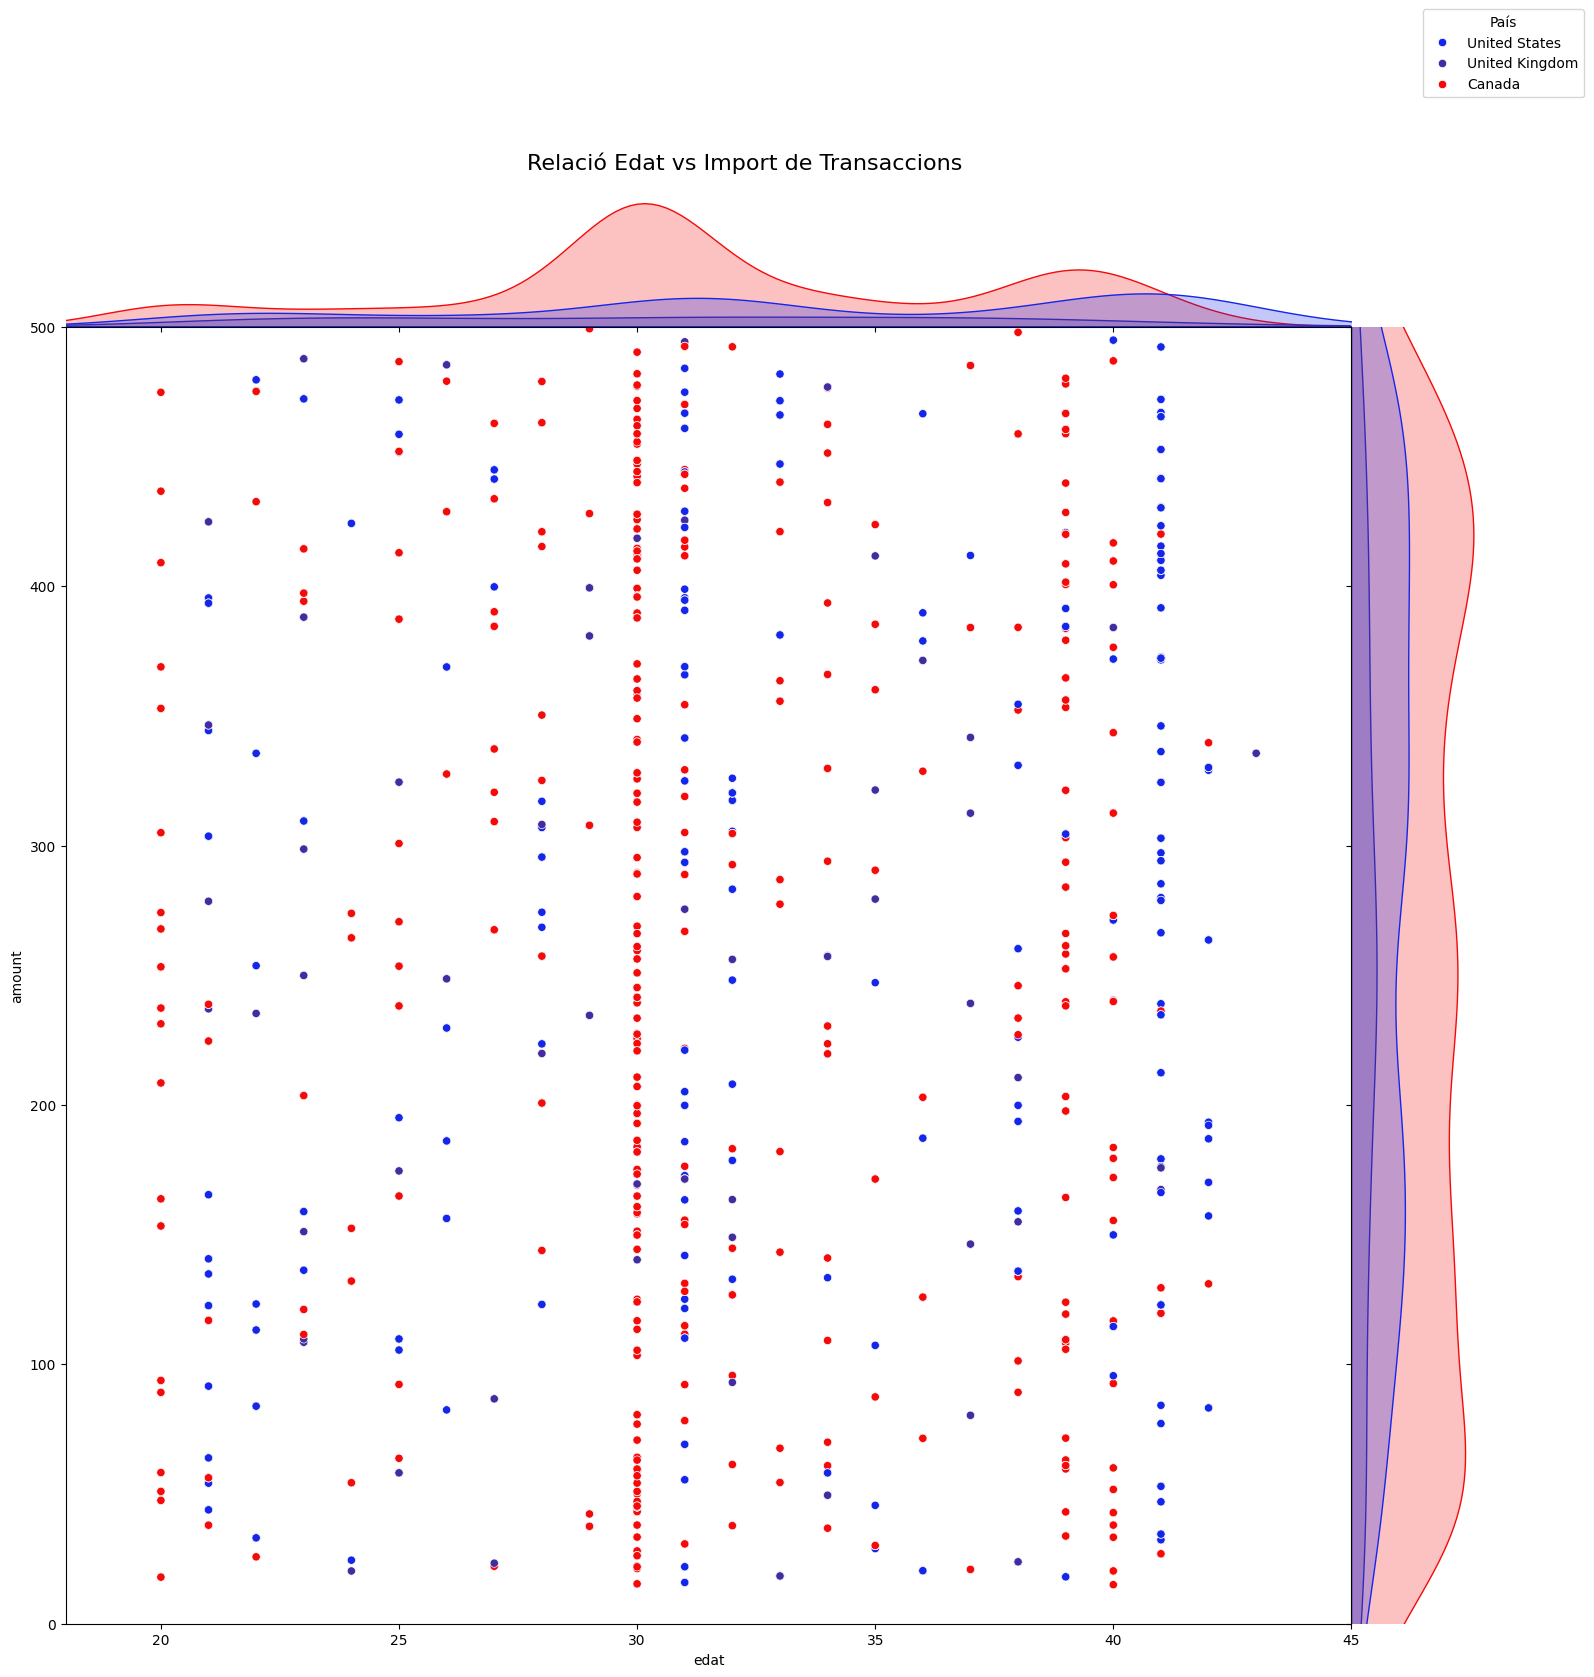

In [58]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


# Jointplot amb cada transacció individual
g=sns.jointplot(data=df_combinat, x='edat', y='amount', kind='scatter', hue='country', palette=colors_paísos, space=0, xlim=[18,45], ylim=[0, 500],height=15,  ratio=10)
plt.suptitle('Relació Edat vs Import de Transaccions', y=1.02, fontsize=16)
plt.legend(title='País', bbox_to_anchor=(1.05, 1.25), loc='upper left')
plt.show()

### Nivell 3

#### Exercici 1:
Implementa un violinplot combinat amb un altre tipus de gràfic.

- Llibreries: seaborn, matplotlib.pyplot
- Gràfic: Violinplot amb Swarmplot superposat
- Variables:  transactions_df[['amount','declined']]
- Interpretació: Podem veure 3 gràfics de violí, un per a cada país de usuari. D'una banda veiem que el major volum es produceix a Canadà, i aquest país és l'únic amb transaccions rebutjades. Regne Unit és el país amb menor número de transaccions. En tots 3 paísos la distribució pel que fa a l¡import de les transaccions és bestant homogeni.  Els punts al gràfic mostren cadascuna de les transaccions i el seu import corresponent.

Visualització de la imatge

C:\Users\PC\AppData\Local\Temp\ipykernel_25952\57838591.py:7: FutureWarning:



The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='count'` for the same effect.



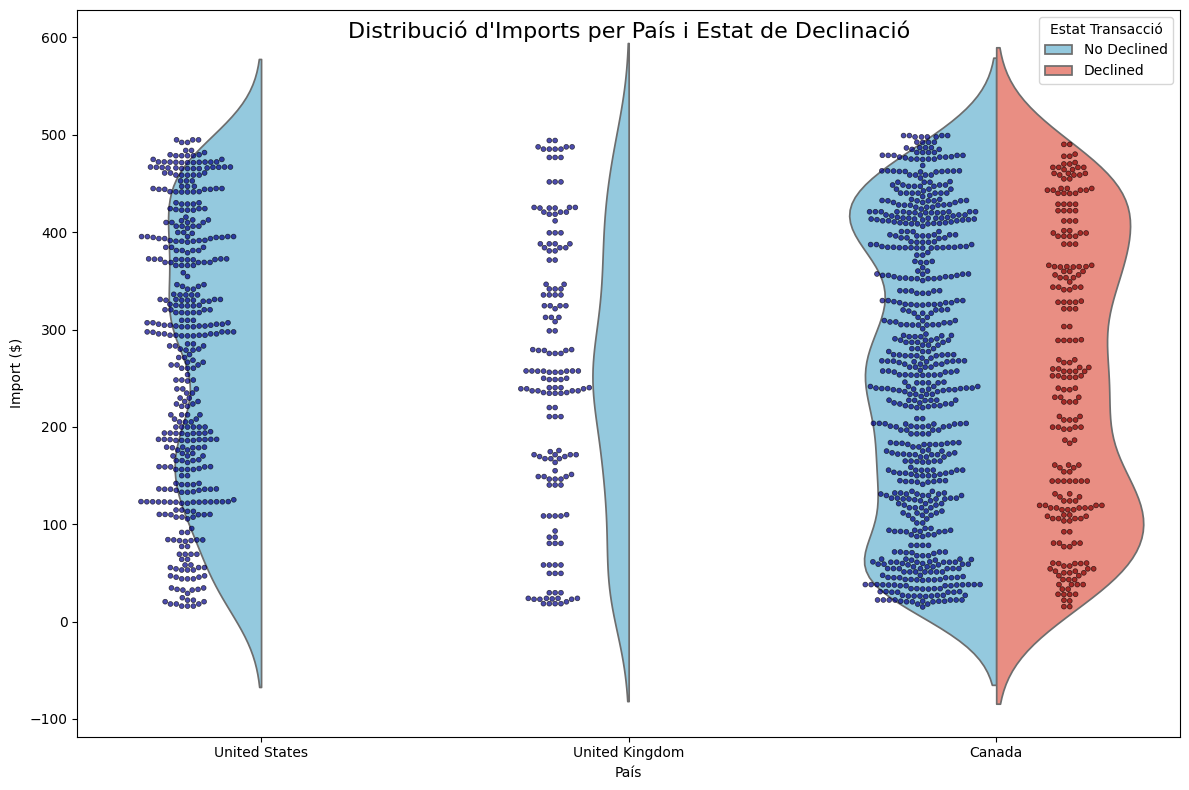

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# 1. Violinplot (base)
ax = sns.violinplot(
    x='country', 
    y='amount', 
    hue='declined',
    data=df_combinat,
    split=True,          # Divideix cada violí per declined
    palette={0: "skyblue", 1: "salmon"},
    inner=None,          # No mostres elements interns
    scale="count"        # Escala segons observacions
)

# 2. Swarmplot superposat
g=sns.swarmplot(
    x='country', 
    y='amount', 
    hue='declined',
    data=df_combinat,
    dodge=True,          # Separa declined
    palette={0: "darkblue", 1: "darkred"},
    alpha=0.7,           # Transparència
    size=3.5,            # Mida dels punts
    edgecolor='k',       # Vora negra
    linewidth=0.5
)

# 3. Ajustar llegenda
handles, labels = ax.get_legend_handles_labels()
plt.legend(
    handles[:2],         # Agafa només dues entrades (evitar duplicats)
    ['No Declined', 'Declined'],
    title='Estat Transacció',
    loc='upper right'
)
# 4. Títols i eixos
plt.title('Distribució d\'Imports per País i Estat de Declinació',  fontsize=16, y=0.95)
plt.xlabel('País')
plt.ylabel('Import ($)')
# plt.ylim(0, df_combinat['amount'].quantile(0.95))  # Eliminar outliers extrems

plt.tight_layout()
plt.show()

#### Exercici 2:
Genera un FacetGrid per a visualitzar múltiples aspectes de les dades simultàniament

- Llibreries:  matplotlib.pyplot, seaborn
- Gràfic: FacetGrid amb Scatterplot
- Variables: edad usuaris, transactions_df['amount']
- Interpretació: Les columnes corresponen als paísos dels ususaris i les files corresponen al camp 'declined' separant les transaccions rebutjades de les acceptades. Cada punt representa  una transacció.
Podem veure d'una banda que Canadà és l'unic païs amb transaccions rebutjades. A més podem veure una concentració de transaccions d'els usuaris prop dels 30 anys i d'els 40 anys. 

Visualització de la imatge

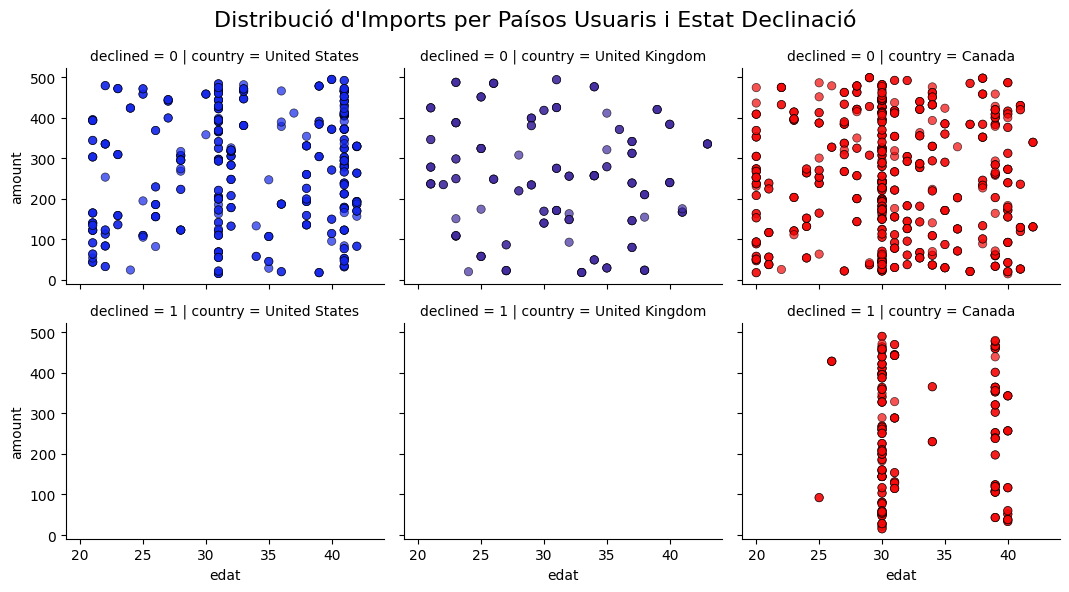

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt 

FG = sns.FacetGrid(df_combinat, col="country", row="declined", height=3, aspect=1.2)
FG.map_dataframe(sns.scatterplot,
    x='edat',
    y='amount'
    , hue='country', palette=colors_paísos, alpha=0.7, edgecolor='k', linewidth=0.5
)

# Ajusta l'espai per al títol superior
plt.subplots_adjust(top=0.85)  # Deixa un 15% d'espai a dalt

# Afegeix el títol principal centrat a la part superior
FG.fig.suptitle('Distribució d\'Imports per Paísos Usuaris i Estat Declinació', 
                fontsize=16, 
                y=0.98) 

plt.tight_layout()
plt.show()